# **PYTHONG WORKSHOP 3**

## *Why NumPy?*
It offers data structures that are much faster compared to their python counter parts.




In [ ]:
import time
import numpy as np

def time_logger(func):
    """
    A decorator function to log the time a function takes to execute.
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.5f} seconds to execute.")
    return wrapper

@time_logger
def sum_native_python(numbers: list[int]) -> int:
    """
    Sums a list of numbers using native Python.
    """
    return sum(numbers)

@time_logger
def sum_numpy(numbers: np.array) -> np.float64:
    """
    Sums an array of numbers using NumPy.
    """
    return np.sum(numbers)

# creating test data
large_list = list(range(1, 1000000))
large_array = np.array(large_list)

# NOTE the different types
# Compare the performance
print(type(large_list))
sum_native_python(large_list)
print(type(large_array))
sum_numpy(large_array)



<class 'list'>
sum_native_python took 0.00866 seconds to execute.
<class 'numpy.ndarray'>
sum_numpy took 0.00108 seconds to execute.


## *Why is NumPy Faster?*
1.   Implementation of the data structure is often written done in C
2.   In NumPy, operations are vectorized where as native Python iterats over elements, which is inherently slower.
3. Numpy uses Dynamic Arrays where each element is stored contiguously (in other words write next to each other in memory). Python lists use an Array of pointers which means the machine has to follow each pointer to where the data is stored.

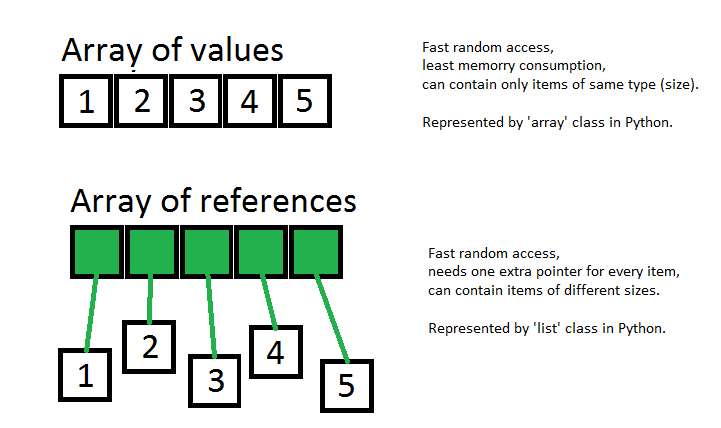

## Creating Arrays
NumPy offers a variety of ways to make arrays. Here's just a few.

In [ ]:
import numpy as np

# Creating an array from a given list of integers.
print(np.array([1, 7, 7, 0, 1, 3]))  # Output: [1 7 7 0 1 3]

# Creating an array of a specified size filled with zeros.
print(np.zeros(6))  # Output: [0. 0. 0. 0. 0. 0.]

# Creating an array of a specified size filled with ones.
print(np.ones(6))  # Output: [1. 1. 1. 1. 1. 1.]

# Creating an array of a specified size filled with random numbers uniformly distributed between 0 and 1.
print(np.random.random(6))  # Output: Random numbers between 0 and 1

# Creating an array of a specified size filled with random numbers that follow standard normal distribution (mean 0 and variance 1).
print(np.random.randn(6))  # Output: Random numbers from a standard normal distribution

# Creating an array with evenly spaced numbers over a specified interval.
print(np.linspace(0, 6, 7))  # Output: [0. 1. 2. 3. 4. 5. 6.]

# Creating an array with numbers spaced evenly on a linear scale.
print(np.arange(0, 6, 1))  # Output: [0 1 2 3 4 5]


[1 7 7 0 1 3]
[0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1.]
[0.70678416 0.77010169 0.57912905 0.01359521 0.86457409 0.89989845]
[ 0.57866851  0.48167318  1.26070398  1.06667907  0.49266427 -0.12399266]
[0. 1. 2. 3. 4. 5. 6.]
[0 1 2 3 4 5]


## Array Operations

NumPy offers a wide range of operations for arrays, making it a powerful tool for numerical computations. Below are some key array operations categorized for clarity:

### 1. Indexing
Array indexing is the same as accessing an python list element.
You can access an array element by referring to its index number. The indexes in NumPy arrays start with 0, meaning that the first element has index 0, and the second has index 1 etc.

**Accessing Elements:** works much the same way as native python
```python
arr = np.array([1, 2, 3, 4])
print(arr[0]) # accesing first value
print(arr[-1]) # negative indexing
```

```
1
4
```

**Slicing Arrays:** Slicing elements from one given index to another given index.
```python
arr = np.array([1, 2, 3, 4, 5, 6, 7])
print(arr[1:5:1]) #includes element 1 but not element 5 at a step of 1
```

```
[2 3 4 5]
```

**Boolean filters:** you can use a boolean mask to filter out certain values
```python
arr = np.array([1, 2, 3, 4, 5, 6, 7])
print(arr[arr > 3])  # arr > 3 would generate an array of True and False
```

```
[ 4 5 6 7]
```

### 2. Basic Operations

**Arithmetic Operations:**
Perform element-wise arithmetic operations such as addition, subtraction, multiplication, and division.

```python
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a + b)  # Element-wise addition
print(a * b)  # Element-wise multiplication

```

```
[5 7 9]
[ 4 10 18]

```

**Broadcasting:**
Allows operations between arrays of different shapes.

```python
a = np.array([1, 2, 3])
print(a+2)
print(a**2)
print(a/10)

```

```
[3 4 5]
[1 4 9]
[0.1 0.2 0.3]

```

**Aggregation Functions:** Compute summary statistics.

```python
print(a.sum())  # Sum of all elements in 'a'
print(a.mean()) # Mean of all elements in 'a'
```


### 3. Shape Manipulation
**Reshape:** Change the shape of an array without changing its data.

```python
a = np.array([1, 2, 3])
print(np.reshape(a, (3, 1)))  # Reshape 'a' to a 3x1 array
```
```
[[1]
 [2]
 [3]]
```


**Transpose:** Permute the dimensions of an array.
```python
print(a.T)  # Transpose of array 'a'
```
```
[1 2 3]
```

Concatenation and Splitting: Combine multiple arrays and split one array into several parts.

```python
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.concatenate([a, b]))  # Concatenate 'a' and 'b'
```

```
[1 2 3 4 5 6]
```

## **Statistical Functions**
Statistical functions in NumPy are essential for data analysis. They include functions like `sum()`, `mean()`, `median()`, `std()`, `var()`, `min()`, `max()`, `argmin()`, `argmax()`, `cumsum()`, and more. These functions allow you to perform operations such as summing, averaging, finding standard deviation, variance, minimum, maximum, and cumulative sums on array elements. Refer to the code below for examples.

In [ ]:
import numpy as np

# Generate a random dataset of 100 values with a mean of 50 and standard deviation of 10
np.random.seed(0)
dataset = np.random.normal(50, 10, 100)

sum_value = np.sum(dataset)
mean_value = np.mean(dataset)
median_value = np.median(dataset)
std_deviation = np.std(dataset)
variance = np.var(dataset)
min_value = np.min(dataset)
max_value = np.max(dataset)
argmin_index = np.argmin(dataset)
argmax_index = np.argmax(dataset)
cumulative_sum = np.cumsum(dataset)

print(f"Sum: {sum_value:.2f}")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum Value: {min_value:.2f}")
print(f"Maximum Value: {max_value:.2f}")
print(f"Index of Minimum Value: {argmin_index}")
print(f"Index of Maximum Value: {argmax_index}")
print(dataset)
print(f"Cumulative Sum: {cumulative_sum}")


Sum: 5059.81
Mean: 50.60
Median: 50.94
Standard Deviation: 10.08
Variance: 101.58
Minimum Value: 24.47
Maximum Value: 72.70
Index of Minimum Value: 20
Index of Maximum Value: 24
[67.64052346 54.00157208 59.78737984 72.40893199 68.6755799  40.2272212
 59.50088418 48.48642792 48.96781148 54.10598502 51.44043571 64.54273507
 57.61037725 51.21675016 54.43863233 53.33674327 64.94079073 47.94841736
 53.13067702 41.45904261 24.47010184 56.53618595 58.64436199 42.5783498
 72.69754624 35.45634325 50.45758517 48.1281615  65.32779214 64.6935877
 51.54947426 53.7816252  41.12214252 30.19203532 46.52087851 51.56348969
 62.30290681 62.02379849 46.12673183 46.97697249 39.51447035 35.79982063
 32.93729809 69.50775395 44.90347818 45.61925698 37.4720464  57.77490356
 33.86102152 47.8725972  41.04533439 53.86902498 44.89194862 38.19367816
 49.71817772 54.28331871 50.66517222 53.02471898 43.65677906 46.37258834
 43.27539552 46.40446838 41.86853718 32.73717398 51.77426142 45.98219064
 33.69801653 54.627822

NumPy empowers users to create random datasets that adhere to the probability density functions of well-known statistical distributions like the Binomial, Normal, Poisson, Exponential, and various others.

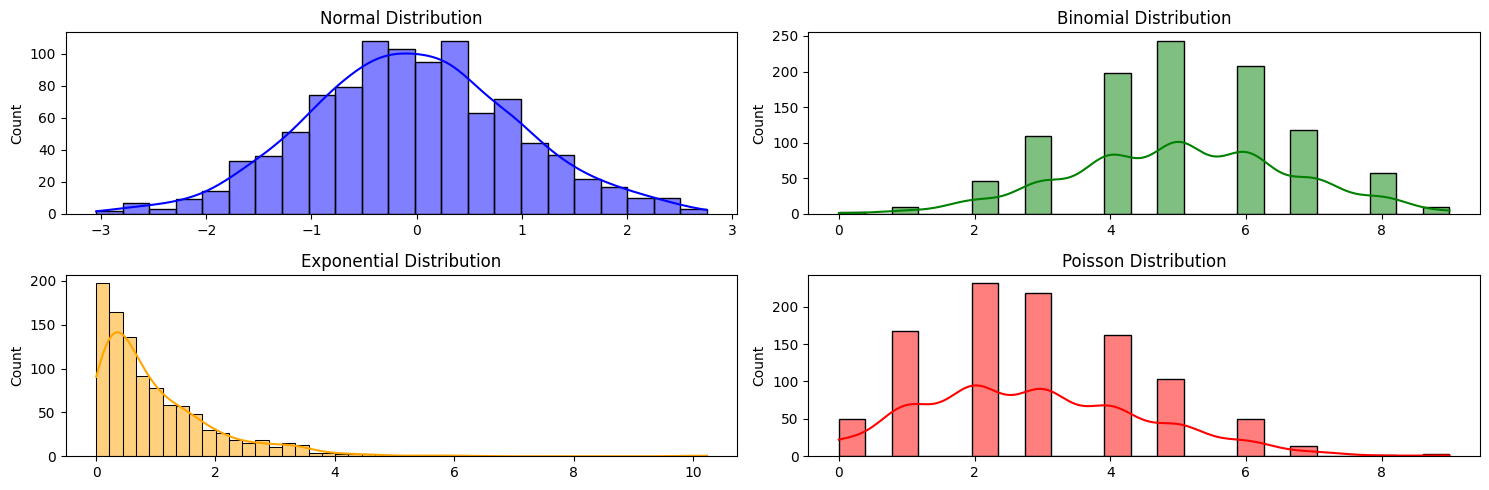

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sample_size = 1000

# Normal Distribution
normal_data = np.random.normal(0, 1, sample_size)

# Binomial Distribution
binomial_data = np.random.binomial(10, 0.5, sample_size)

# Exponential Distribution
exponential_data = np.random.exponential(1, sample_size)

# Poisson Distribution
poisson_data = np.random.poisson(3, sample_size)

# Create subplots using Seaborn displot
plt.figure(figsize=(15, 5))

# Plot Normal Distribution
plt.subplot(2, 2, 1)
sns.histplot(normal_data, kde=True, color='blue')
plt.title('Normal Distribution')

# Plot Binomial Distribution
plt.subplot(2, 2, 2)
sns.histplot(binomial_data, kde=True, color='green')
plt.title('Binomial Distribution')

# Plot Exponential Distribution
plt.subplot(2, 2, 3)
sns.histplot(exponential_data, kde=True, color='orange')
plt.title('Exponential Distribution')

# Plot Poisson Distribution
plt.subplot(2, 2, 4)
sns.histplot(poisson_data, kde=True, color='red')
plt.title('Poisson Distribution')

# Show the plots
plt.tight_layout()
plt.show()

## **Mathematical Functions**
Numpy offers some mathematical functions similar to the standard ```Math``` library. Plesae check the [docs](https://numpy.org/doc/stable/reference/routines.math.html) and try to familiarise yourself.

**Sine and Cosine:** Compute sine and cosine values for an array of angles.

```python
np.sin(array)
np.cos(array)
```

**Exponential:** Calculate the exponential values of elements in an array.

```python
np.exp(array)
```

**Logarithm:** Compute the natural logarithm of elements in an array.

```python
np.log(array)
```

**Matrix Multiplication:** Perform matrix multiplication.

```python
np.dot(matrix1, matrix2)
matrix1 @ matrix2
```

**Eigenvalues and Eigenvectors:** Compute eigenvalues and eigenvectors of a matrix.
```python
np.linalg.eig(matrix)
```

**Exercise 1:** Find the derivative of ``` y = 1/x**2 * np.sin(x)```. Plot it's derivative/gradient against itself. See if you can also find it's integral.

In [ ]:
### COMPLETE ###
x = np.linspace(1,10,100)
y = 1/x**2 * np.sin(x)

dydx = np.gradient(y,x) ## Might Need to search the documentation or google
y_int = np.cumsum(y) * (x[1] - x[0])


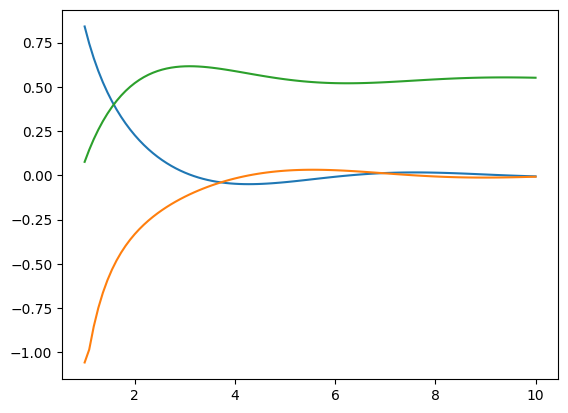

In [ ]:
### TESTS CODE HERE ###
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,y_int)

## **Multi-Dimensional Arrays**

As a prerequisite for Multi-Dimensional arrays it might be useful to introduce the concept of **lists of lists**.


In [ ]:
mtrx = [[1,2,3],
        [4,5,6],
        [7,8,9]]

print(mtrx[1])
print(mtrx[1][1])

[4, 5, 6]
5


**Exercise 2:** Flatten ```mtrx``` turning it intro a 1-d list.

In [ ]:
print([item for arr in mtrx for item in arr])
print(sum(mtrx,[]))

lst = []

for i in range(len(mtrx)):
  for j in range(len(mtrx[:])):
    lst.append(mtrx[i][j])


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


## *Creating 2-d Array*

Here are few ways to create Muti-Dimensional Arrays.

In [ ]:
import numpy as np

# Creating an array from a given list of integers.
print(np.array([[1,2,3],[4,5,6], [7,8,9]]))

# Creating an array of a specified size filled with zeros.
print(np.zeros((3,3)))

# Creating an array of a specified size filled with ones.
print(np.ones((3,3)))



[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## **Multi_Dimensional Array Operations**

**Element Indexing:** works the same way it did on 1-d arrays.

```python
a1 = np.array([[4,6,4],[2,1,2],[5,6,7]])
print(a1[0])
print(a1[:,1]) #the middle column
print(a1[1:][:,1]) #the middle values of the last two rows
```
```
array([4, 6, 4])
array([6, 1, 6])
array([1, 6])
```


**Arithmetic Operations:** works the same way it did on 1-d arrays.

```python
a1 = np.array([[4,6,4],[2,1,2],[5,6,7]])
a1*2
```
```
array([[ 8, 12,  8],
       [ 4,  2,  4],
       [10, 12, 14]])
```

**Boolean Indexing:** You can create multi-dimensional boolean masks

```python
print(a1>5)
print(a2[a1>5])

```
```
array([[False,  True, False],
       [False, False, False],
       [False,  True,  True]])

array([ 0.32168433,  0.41624801, -2.45950882])

```

**Flattening:** Flattening NumPy arrays is much more trivial

```python
a1.ravel()
```

```
array([4, 6, 4, 2, 1, 2, 5, 6, 7])
```


## **Basic Linear Algebra**

### *Vector Operations*
**Vector Addition and Subtraction:**

In [ ]:
import numpy as np

# Define two vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Vector addition
result_addition = vector1 + vector2
print("Vector Addition:", result_addition)

# Vector subtraction
result_subtraction = vector1 - vector2
print("Vector Subtraction:", result_subtraction)




Vector Addition: [5 7 9]
Vector Subtraction: [-3 -3 -3]


- **Scalar-Vector Multiplication:**





In [ ]:
import numpy as np

# Define a vector
vector = np.array([1, 2, 3])

# Scalar-vector multiplication
scalar = 2
result_multiplication = scalar * vector
print("Scalar-Vector Multiplication:", result_multiplication)


Scalar-Vector Multiplication: [2 4 6]


- **Dot Product:**




In [ ]:
import numpy as np

# Define two vectors
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

# Calculate the dot product
dot_product = np.dot(vector1, vector2)
print("Dot Product:", dot_product)

Dot Product: 32


- **Norm (Magnitude) of a Vector:**

In [ ]:
import numpy as np

# Define a vector
vector = np.array([3, 4])

# Calculate the norm (magnitude) of the vector
norm = np.linalg.norm(vector)
print("Norm (Magnitude) of Vector:", norm)

Norm (Magnitude) of Vector: 5.0



### *Matrix Operations*

- **Matrix Multiplication:**

In [ ]:
import numpy as np

# Define two matrices
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# Matrix multiplication
result_multiplication = np.dot(matrix1, matrix2)
result_multiplication = matrix1 @ matrix2
print("Matrix Multiplication:")
print(result_multiplication)

Matrix Multiplication:
[[19 22]
 [43 50]]


- **Matrix Transposition:**

In [ ]:
import numpy as np

# Define a matrix
matrix = np.array([[1, 2], [3, 4]])

# Transpose the matrix
transposed_matrix = np.transpose(matrix)
print("Transposed Matrix:")
print(transposed_matrix)

Transposed Matrix:
[[1 3]
 [2 4]]


- **Determinant and Inverse:**

In [ ]:
import numpy as np

# Define a square matrix
matrix = np.array([[1, 2], [3, 4]])

# Calculate the determinant
determinant = np.linalg.det(matrix)
print("Determinant of Matrix:", determinant)

# Calculate the inverse (if it exists)
inverse_matrix = np.linalg.inv(matrix)
print("Inverse of Matrix (if exists):")
print(inverse_matrix)


Determinant of Matrix: -2.0000000000000004
Inverse of Matrix (if exists):
[[-2.   1. ]
 [ 1.5 -0.5]]


- **Eigenvalues and Eigenvectors:**

In [ ]:
import numpy as np

# Define a square matrix
matrix = np.array([[1, 2], [2, 1]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


Eigenvalues: [ 3. -1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


##Exercise 3: Matrix Operations

Create two NumPy arrays to represent matrices M and N:

- M as a 3x3 matrix with elements:
```
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]
```
- N as a 3x2 matrix with elements:
```
[[9, 8],
 [7, 6],
 [5, 4]]
```


**Perform the following matrix operations:**

- Multiply matrix M by matrix N to obtain the result P.
Calculate the determinant of matrix M.
Calculate the inverse (if it exists) of matrix N.
Print the results of each operation along with appropriate explanations.

**Sample Output:**

```
Matrix M:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix N:
[[9 8]
 [7 6]
 [5 4]]

1. Matrix Multiplication:
   M × N =
   [[ 38  32]
    [101  86]
    [164 140]]

2. Determinant of Matrix M:
   Det(M) = 0.0

3. Inverse of Matrix N:
   N has no inverse.

```

This exercise challenges you to perform matrix multiplication, calculate determinants, and check for the existence of matrix inverses. It reinforces your understanding of linear algebra concepts using NumPy operations.

In [ ]:
import numpy as np

# Create matrices M and N
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
N = np.array([[9, 8], [7, 6], [5, 4]])

# 1. Matrix Multiplication
P = np.dot(M, N)

# 2. Determinant of Matrix M
det_M = np.linalg.det(M)

# 3. Inverse of Matrix N (if it exists)
try:
    inverse_N = np.linalg.inv(N)
except np.linalg.LinAlgError:
    inverse_N = None

# Print the results
print("Matrix M:")
print(M)
print("\nMatrix N:")
print(N)

print("\n1. Matrix Multiplication (M × N):")
print(P)

print("\n2. Determinant of Matrix M:")
print(f"Det(M) = {det_M:.1f}")

print("\n3. Inverse of Matrix N:")
if inverse_N is not None:
    print(inverse_N)
else:
    print("N has no inverse.")


Matrix M:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix N:
[[9 8]
 [7 6]
 [5 4]]

1. Matrix Multiplication (M × N):
[[ 38  32]
 [101  86]
 [164 140]]

2. Determinant of Matrix M:
Det(M) = 0.0

3. Inverse of Matrix N:
N has no inverse.
